In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

plt.rc('axes', titlesize=20)
plt.rc('figure', figsize=(16, 10))

In [2]:
df = pd.read_csv("stats.csv", index_col="date", parse_dates=['date'], infer_datetime_format=True)
cases_df = df.loc[:, ["cases", "deaths"]]
tests_df = df.loc[:, ["test_positive", "test_total"]]

evolution_df = df.diff()[["cases", "deaths", "test_total"]].iloc[1:]

In [3]:
smas = pd.DataFrame()
smas["cases_SMA_7"] = evolution_df["cases"].rolling(window=7).mean()
smas["cases_SMA_21"] = evolution_df["cases"].rolling(window=21).mean()

smas["deaths_SMA_7"] = evolution_df["deaths"].rolling(window=7).mean()
smas["deaths_SMA_21"] = evolution_df["deaths"].rolling(window=21).mean()

# Evolution Charts

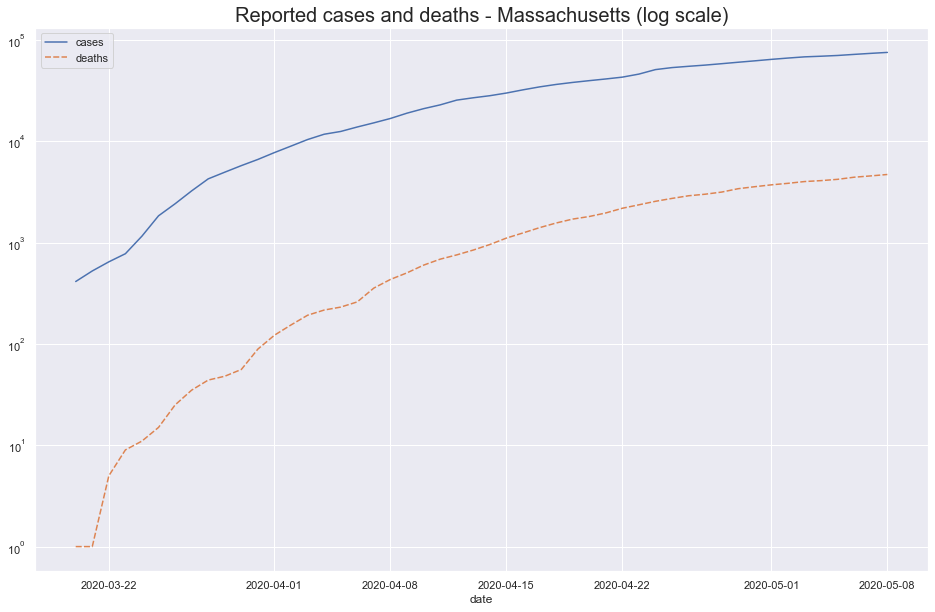

In [4]:
# plt.figure(figsize=(16, 10))
ax = sns.lineplot(data=cases_df)
ax.set_yscale("log")

plt.title("Reported cases and deaths - Massachusetts (log scale)")

plt.show()

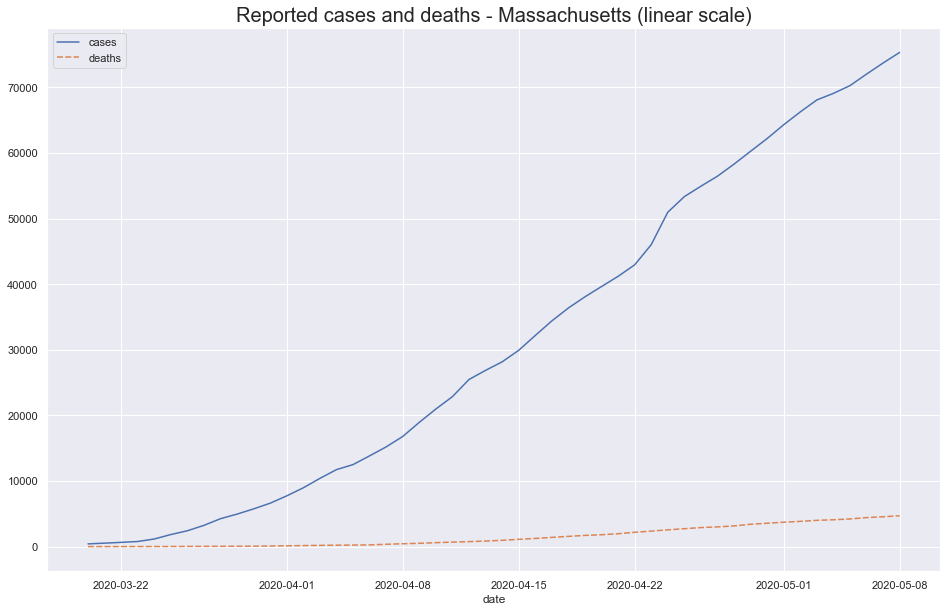

In [5]:
ax = sns.lineplot(data=cases_df)
ax.set_yscale("linear")

plt.title("Reported cases and deaths - Massachusetts (linear scale)")

plt.show()

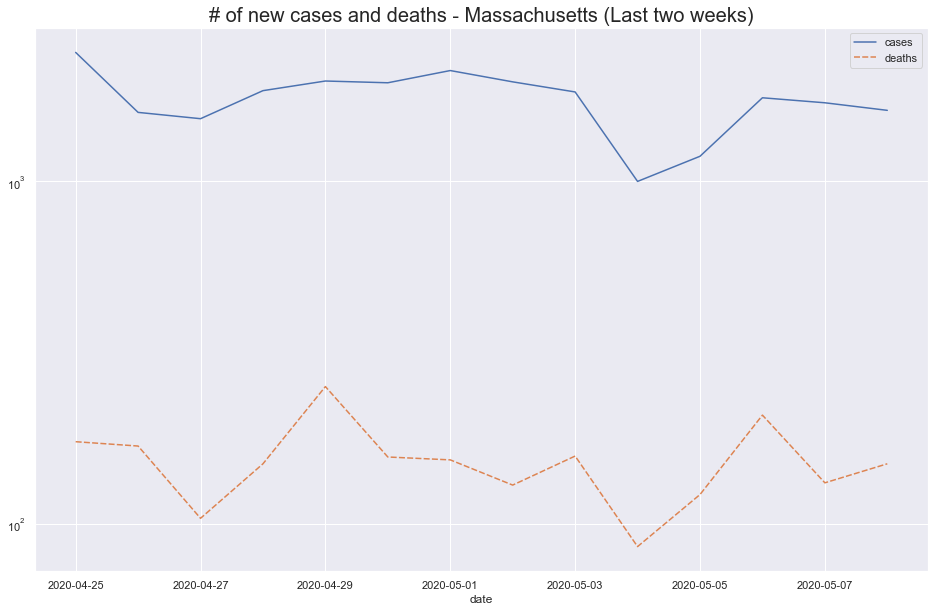

In [6]:
ax = sns.lineplot(data=cases_df.diff().iloc[-14:])
ax.set_yscale("log")

plt.title("# of new cases and deaths - Massachusetts (Last two weeks)")

plt.show()

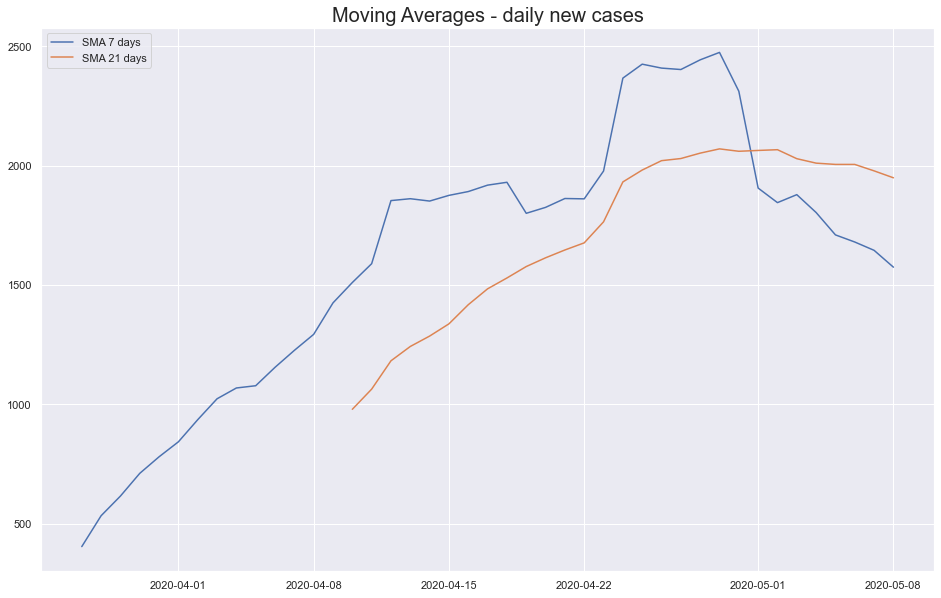

In [7]:
plt.plot(smas["cases_SMA_7"], label="SMA 7 days")
plt.plot(smas["cases_SMA_21"], label="SMA 21 days")
plt.legend(loc=2)
plt.title("Moving Averages - daily new cases")
plt.show()

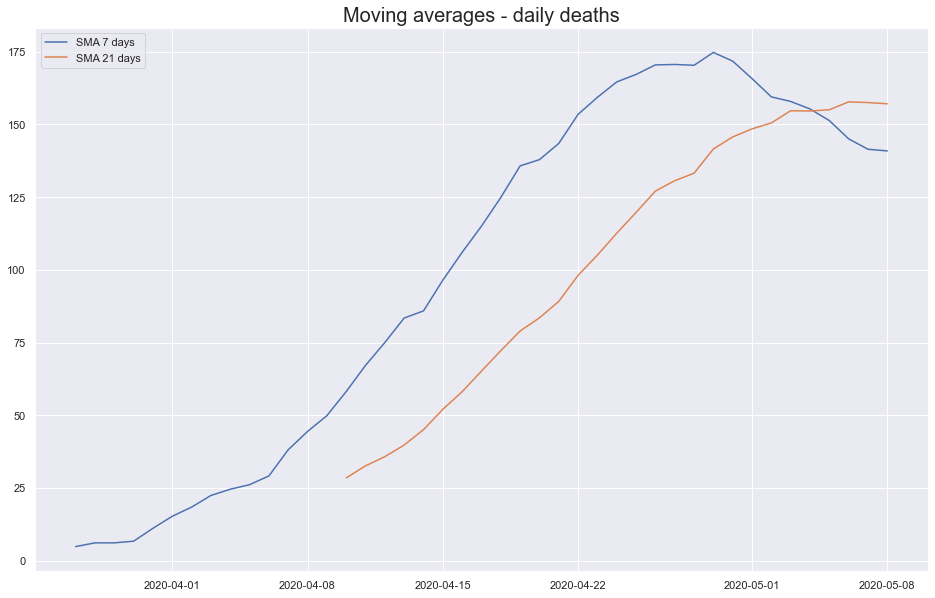

In [8]:
plt.plot(smas["deaths_SMA_7"], label="SMA 7 days")
plt.plot(smas["deaths_SMA_21"], label="SMA 21 days")
plt.legend(loc=2)
plt.title("Moving averages - daily deaths")
plt.show()

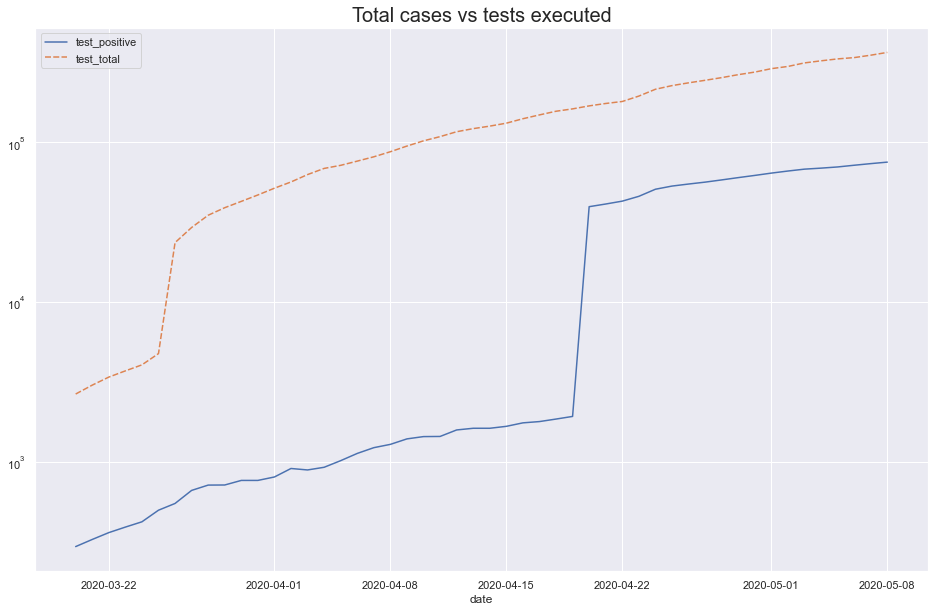

In [9]:
ax = sns.lineplot(data=tests_df)
ax.set_yscale("log")

plt.title("Total cases vs tests executed")

plt.show()

   # Data for the past week

## Daily new cases

In [10]:

evolution_df.iloc[-7:]

,cases,deaths,test_total
date,,,
2020-05-02,1952.0,130.0,9358.0
2020-05-03,1824.0,158.0,15652.0
2020-05-04,1000.0,86.0,9622.0
2020-05-05,1184.0,122.0,9081.0
2020-05-06,1754.0,208.0,6290.0
2020-05-07,1696.0,132.0,11993.0
2020-05-08,1612.0,150.0,14391.0


## Daily percent change

In [11]:
percentage_changes = df.pct_change().iloc[-7:]

for column in percentage_changes.columns:
    percentage_changes[column] = pd.Series(["{0:.2f}%".format(val * 100) for val in percentage_changes[column]], index = percentage_changes.index)
    
percentage_changes

,cases,deaths,test_positive,test_total
date,,,,
2020-05-02,3.04%,3.50%,3.04%,3.23%
2020-05-03,2.75%,4.11%,2.75%,5.23%
2020-05-04,1.47%,2.15%,1.47%,3.06%
2020-05-05,1.71%,2.98%,1.71%,2.80%
2020-05-06,2.50%,4.94%,2.50%,1.89%
2020-05-07,2.35%,2.99%,2.35%,3.53%
2020-05-08,2.19%,3.30%,2.19%,4.09%
